## Complete Case Analysis

- Also called "lit-wise deletion".

- Discarding observations with **any** missing values.

- Can be simply applied by dropna().

#### Assumptions

- Data is **missing completely at random**

- No more than 5% of the total dataset contains missing data

#### Advantages

- No data manipulation required.

- Preserves variable distribution (data is MCAR)

#### Disadvantages

- Can discard a large fraction of the original dataset (if missing data is abundant)

- Exclude observations could be informative (if data is not missing at random

- CCA will create a biased dataset (i.e., the complete dataset differs from the original data) if the data is not missing at random.

- When using our models in production, the model will not be able to handle missing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

TEST_SIZE=0.3
RANDOM_STATE=44
# display all columns of the datafame
pd.set_option("display.max_columns", None)

In [2]:
data=pd.read_csv("../data/houseprice.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
vars_with_na = [var for var in data.columns if data[var].isna().sum() > 0]
vars_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
data[vars_with_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

The data have both categorical and numerical missing data

In [16]:
# Let's find the proportion of missing data in each var
na = data[vars_with_na].isna().mean()
na_df = pd.DataFrame(na.reset_index())
na_df.columns=['vars', 'na_proportion']
na_df.sort_values('na_proportion', ascending=False, inplace=True)
na_df

,vars,na_proportion
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
2,MasVnrType,0.597260
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479


We can see that for the first 6 vars, there are high proportion of missing values (>50%), apply CCA on those vars would end up losing abundance of data, so we will do the CCA on others vars only. The first 6 vars def need other imputation techniques.

In [19]:
# Let do CCA on vars which have less than 5% of missing values
vars_for_cca = na_df[na_df['na_proportion']<0.05]['vars']
vars_for_cca


8    BsmtFinType2
6    BsmtExposure
7    BsmtFinType1
5        BsmtCond
4        BsmtQual
3      MasVnrArea
9      Electrical
Name: vars, dtype: object

In [20]:
# What's left if we remove all na from those vars
len(data.dropna(subset=vars_for_cca)) / len(data)

0.9671232876712329

In [21]:
# create the Complete Case Dataset
data_cca = data.dropna(subset=vars_for_cca)
data.shape, data_cca.shape

((1460, 81), (1412, 81))

<Axes: >

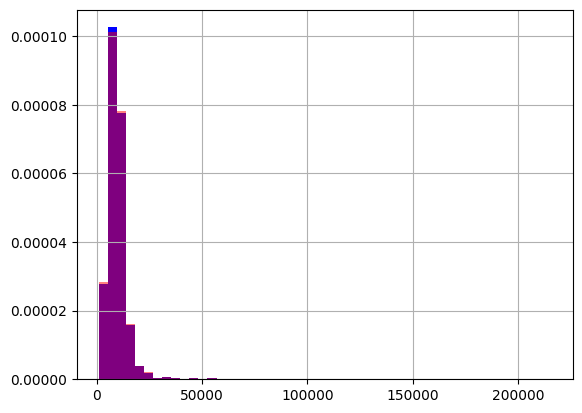

In [24]:
# Check the distribution of some vars before and after cca
# (vars that not in vars_for_cca may change if theirs rows 
# affected by a var that is missing, who knows, just have a look)
fig, ax = plt.subplots()
data["LotArea"].hist(bins=50, ax=ax, density=True, color="blue")
data_cca["LotArea"].hist(bins=50, ax=ax, density=True, color="red", alpha=0.5)

<Axes: ylabel='Density'>

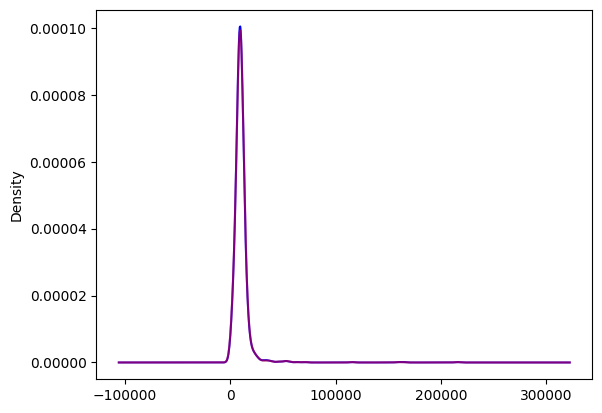

In [25]:
fig, ax = plt.subplots()
data["LotArea"].plot.density(color="blue")
data_cca["LotArea"].plot.density(color="red", alpha=0.5)

<Axes: >

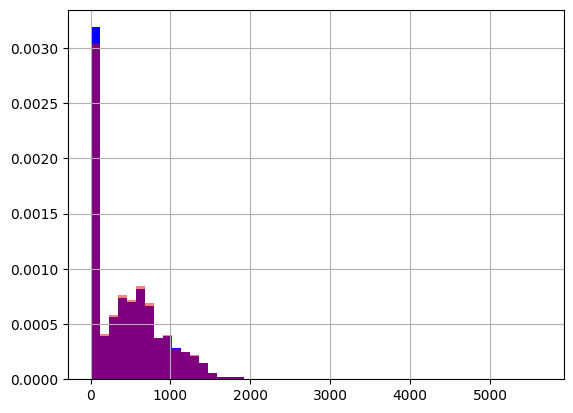

In [26]:
# Check changes for vars that were dropped na too
fig, ax = plt.subplots()
data["BsmtFinSF1"].hist(bins=50, ax=ax, density=True, color="blue")
data_cca["BsmtFinSF1"].hist(bins=50, ax=ax, density=True, color="red", alpha=0.5)

<Axes: ylabel='Density'>

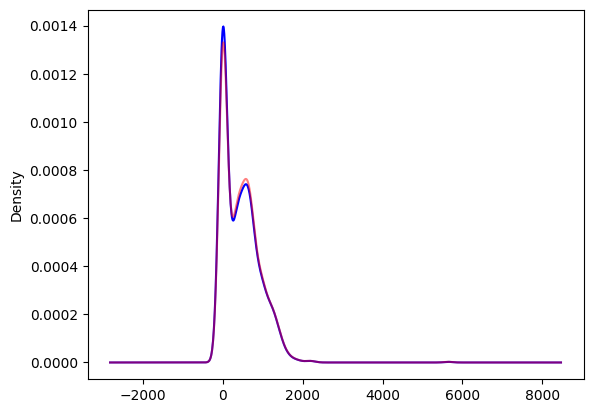

In [27]:
fig, ax = plt.subplots()
data["BsmtFinSF1"].plot.density(color="blue")
data_cca["BsmtFinSF1"].plot.density(color="red", alpha=0.5)

We can see clearly that CCA technique does not change the distribution much.